# House power consumption 

## Problem Description
The household power consumption dataset that describes electricity usage for a single house over four years.

How to explore and understand the dataset using a suite of line plots for the series data and histogram for the data distributions.

How to use the new understanding of the problem to consider different framings of the prediction problem, ways the data may be prepared, and modeling methods that may be used.

## Libraries used
1. numpy
2. pandas
3. matplotlib
4. sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


## Dataset description
###### The dataset includes measures about specific energy uses.

###### The documentation identifies the following variables of interest:
global_active_power: The total active power consumed by the household (kilowatts).

global_reactive_power: The total reactive power consumed by the household (kilowatts). voltage: Average voltage (volts).

global_intensity: Average current intensity (amps).

sub_metering_1: Active energy for kitchen (watt-hours of active energy).

sub_metering_2: Active energy for laundry (watt-hours of active energy).

sub_metering_3: Active energy for climate control systems (watt-hours of active energy).

## Load dataset

In [2]:
# load all data
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])


In [3]:
# number of rows and columns in dataset
dataset.shape

(2075259, 7)

In [4]:
# summarize data
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
# replace ? with nan 
dataset.replace('?',np.nan,inplace=True)

The remaining watt-hours can be calculated from the active energy by first converting the active energy to watt-hours then subtracting the other sub-metered active energy in watt-hours, as follows:

#### sub_metering_remainder = (global_active_power * 1000 / 60) -(sub_metering_1 + sub_metering_2 + sub_metering_3)


In [6]:
values = dataset.values.astype('float32')
dataset['Sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [7]:
# save updated dataset
dataset.to_csv('household_power_consumption.csv')

In [8]:
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

In [9]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtypes: float64(8)
memory usage: 142.5 MB


In [11]:
dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtype: object

In [12]:
dataset.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Sub_metering_4           25979
dtype: int64


# deal with missing value
## Data Preprocessing

In [13]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,8):
    if not dataset.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6, 7]

In [14]:
# filling nan with mean in any columns

for j in range(0,8):        
        dataset.iloc[:,j]=dataset.iloc[:,j].fillna(dataset.iloc[:,j].mean())

In [15]:
# another sanity check to make sure that there are not more any nan
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Sub_metering_4           0
dtype: int64

In [16]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00,9.525726e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.833333e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.566667e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.023333e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


### convert every minute data to weekly data formate

In [17]:
dataset = dataset.resample('W').sum()

In [18]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-17,4599.636000,260.928000,4.392778e+05,19579.400000,2033.000000,4733.00000,18267.000000,51627.600051
2006-12-24,17479.311230,1176.421429,2.433006e+06,74001.655519,11192.243847,21353.59704,77459.916895,181316.096150
2006-12-31,19738.701230,1452.581429,2.438453e+06,83032.255519,14239.243847,22630.59704,67249.916895,224858.596000
2007-01-07,14961.068000,1348.954000,2.428490e+06,63122.200000,5857.000000,17599.00000,54193.000000,171702.133319
2007-01-14,16177.425615,1590.407714,2.421925e+06,68855.627759,13421.121923,18990.29852,83362.458447,153849.881348


In [19]:
dataset.shape

(207, 8)

# Data visualization

In [20]:

from pandas import set_option

from pandas.plotting import scatter_matrix
set_option('display.width',100)
set_option('precision',2)
names=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3','Sub_metering_4']


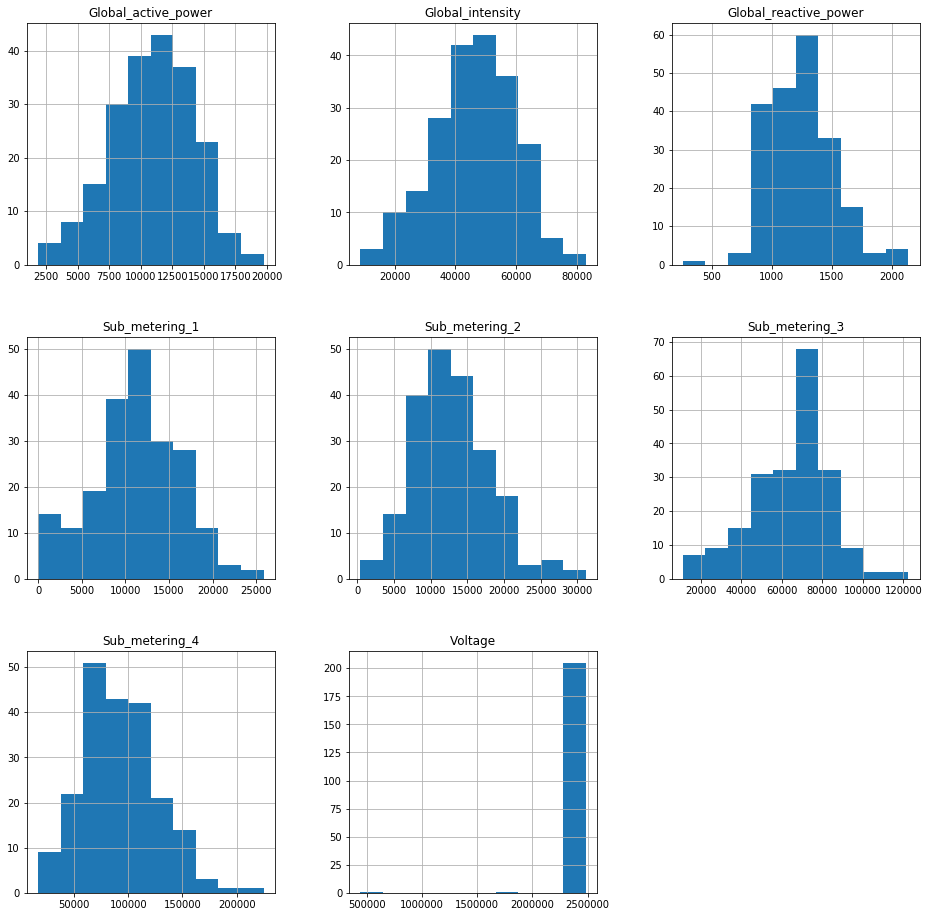

In [21]:
# histogram plots(univariate)
dataset.hist(figsize=(16,16))
plt.show()

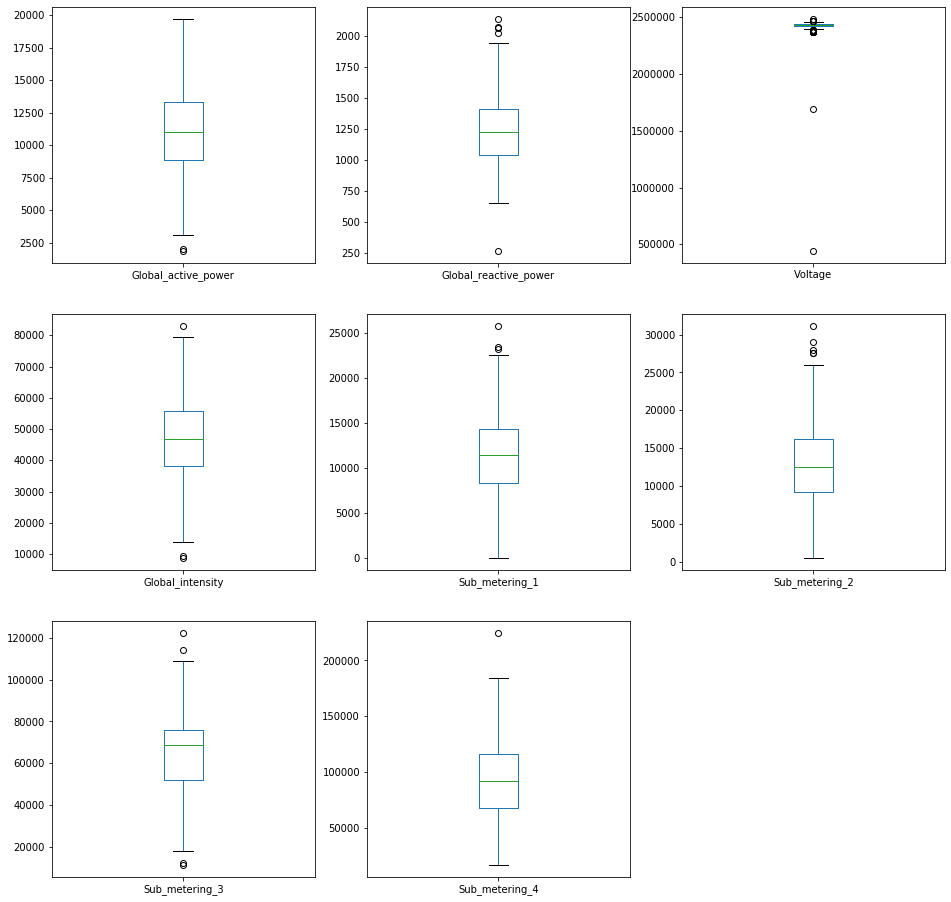

In [22]:
#Boxplot (univariate)
dataset.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False,figsize=(16,16))
plt.show()

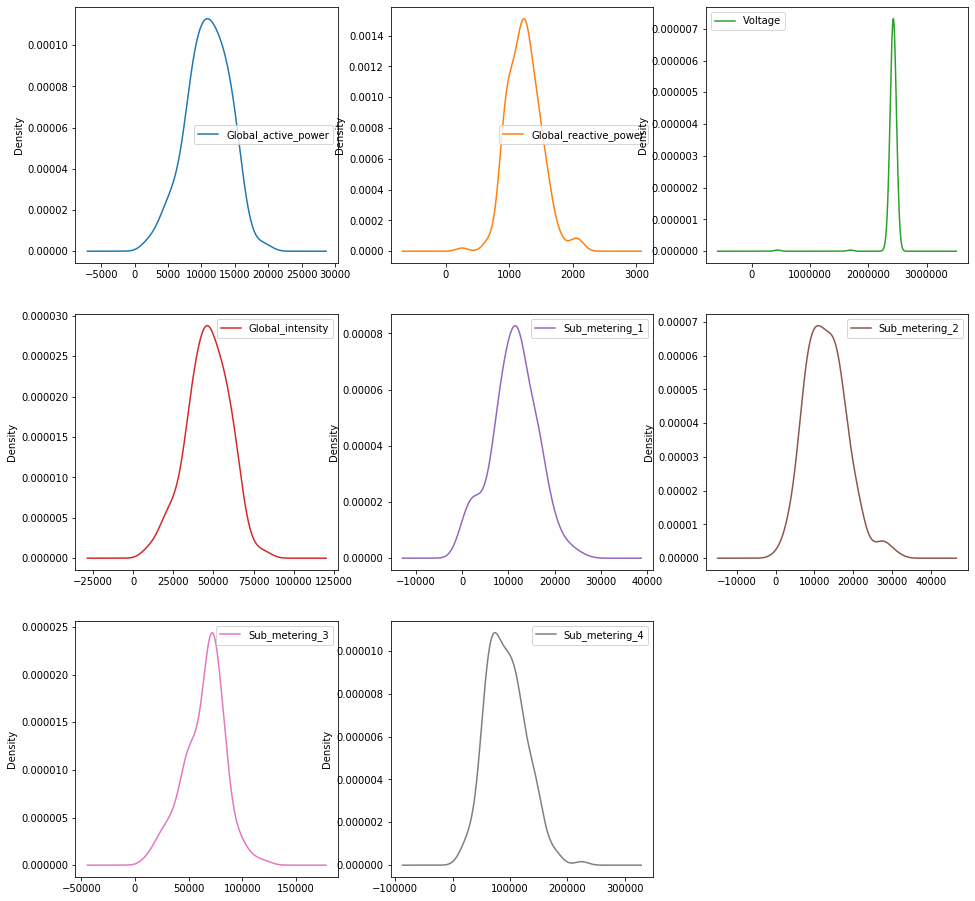

In [23]:
# Density plot (univariate)
dataset.plot(kind='density',subplots=True,layout=(3,3),sharex=False,figsize=(16,16))
plt.show()

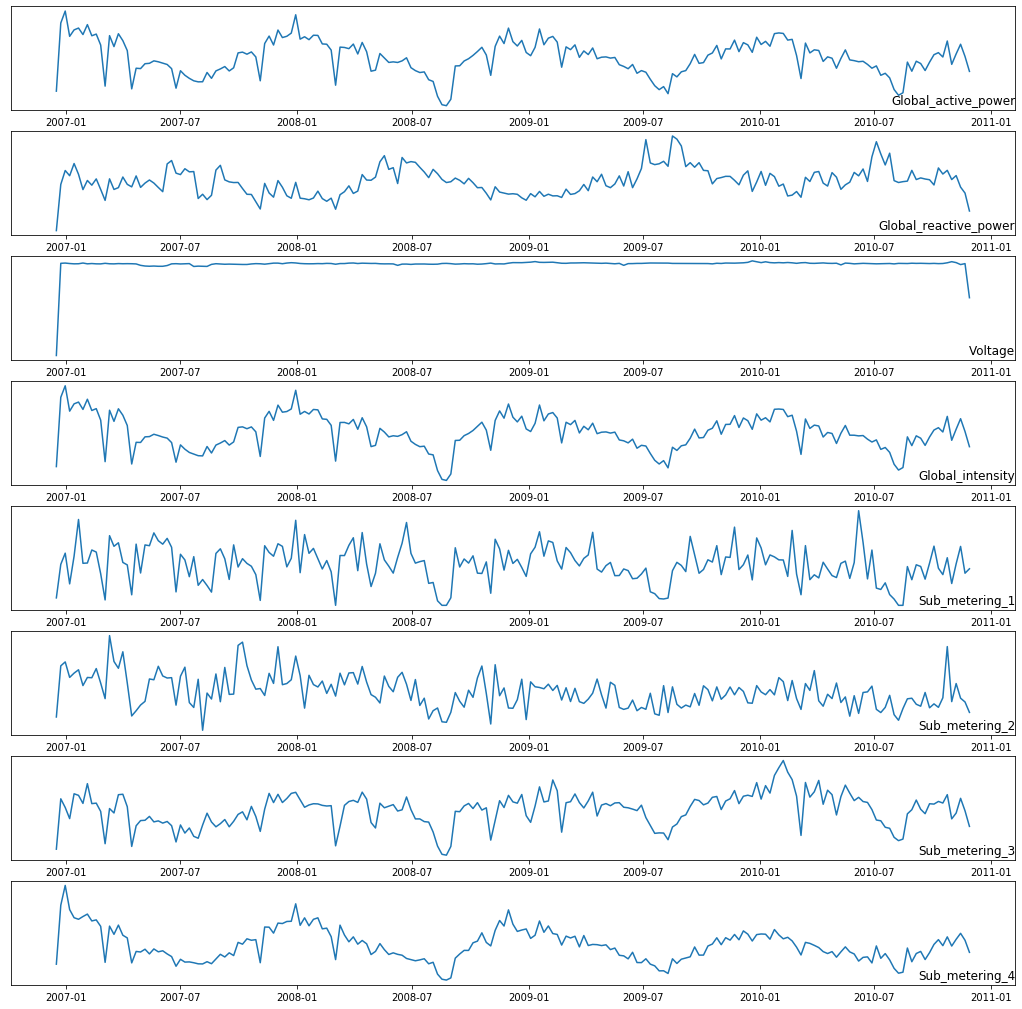

In [24]:
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(dataset.columns)):
    plt.subplot(len(dataset.columns), 1, i+1)
    name=dataset.columns[i]
    plt.plot(dataset[name])
    plt.title(name, y=0, loc='right')
    plt.yticks([])
plt.show()
fig.tight_layout()

In [25]:

years = ['2007', '2008' , '2009' ,'2010']

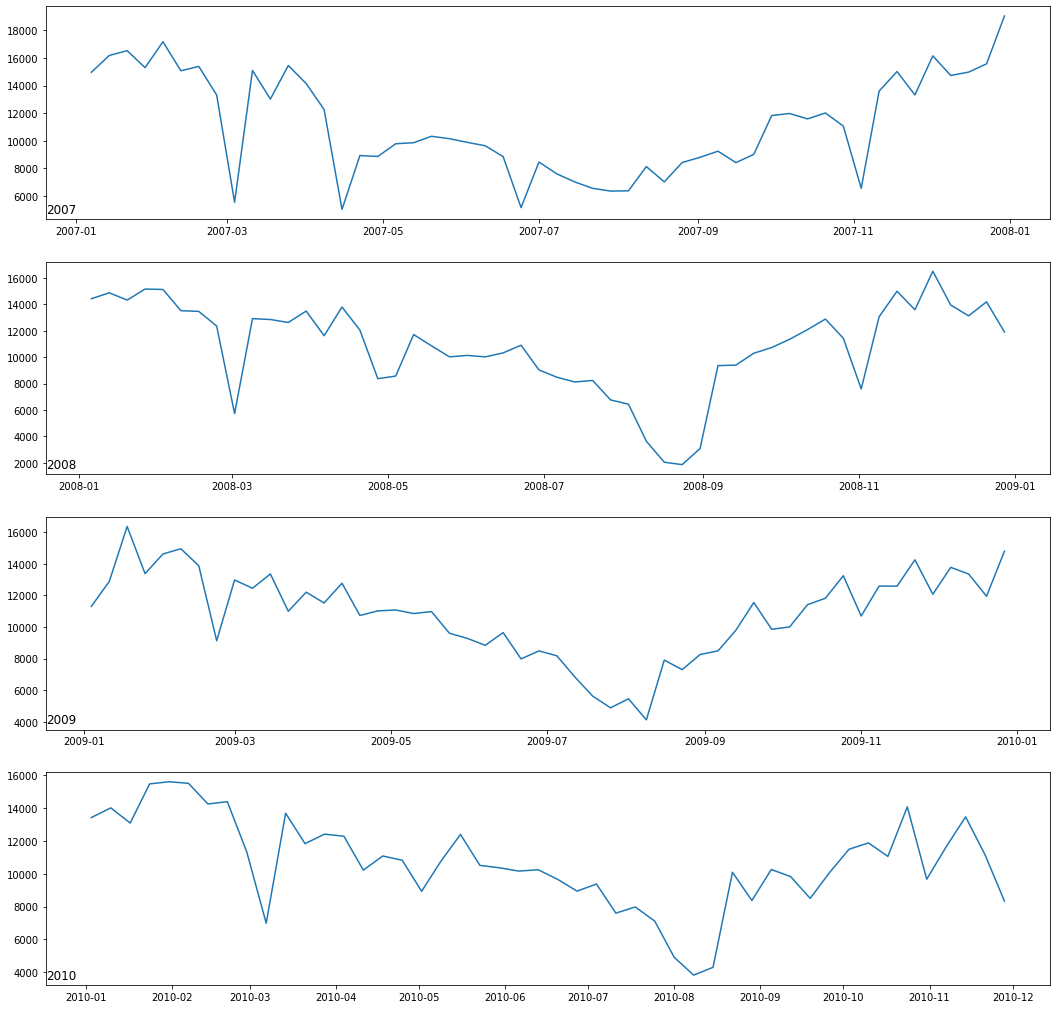

In [26]:
fig, ax=plt.subplots(figsize=(18,18))

for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power_data = dataset[str(year)]
    plt.plot(active_power_data['Global_active_power'])
    plt.title(str(year), y=0, loc='left')
plt.show()
fig.tight_layout()

## Power Consumption Distribution with Histogram

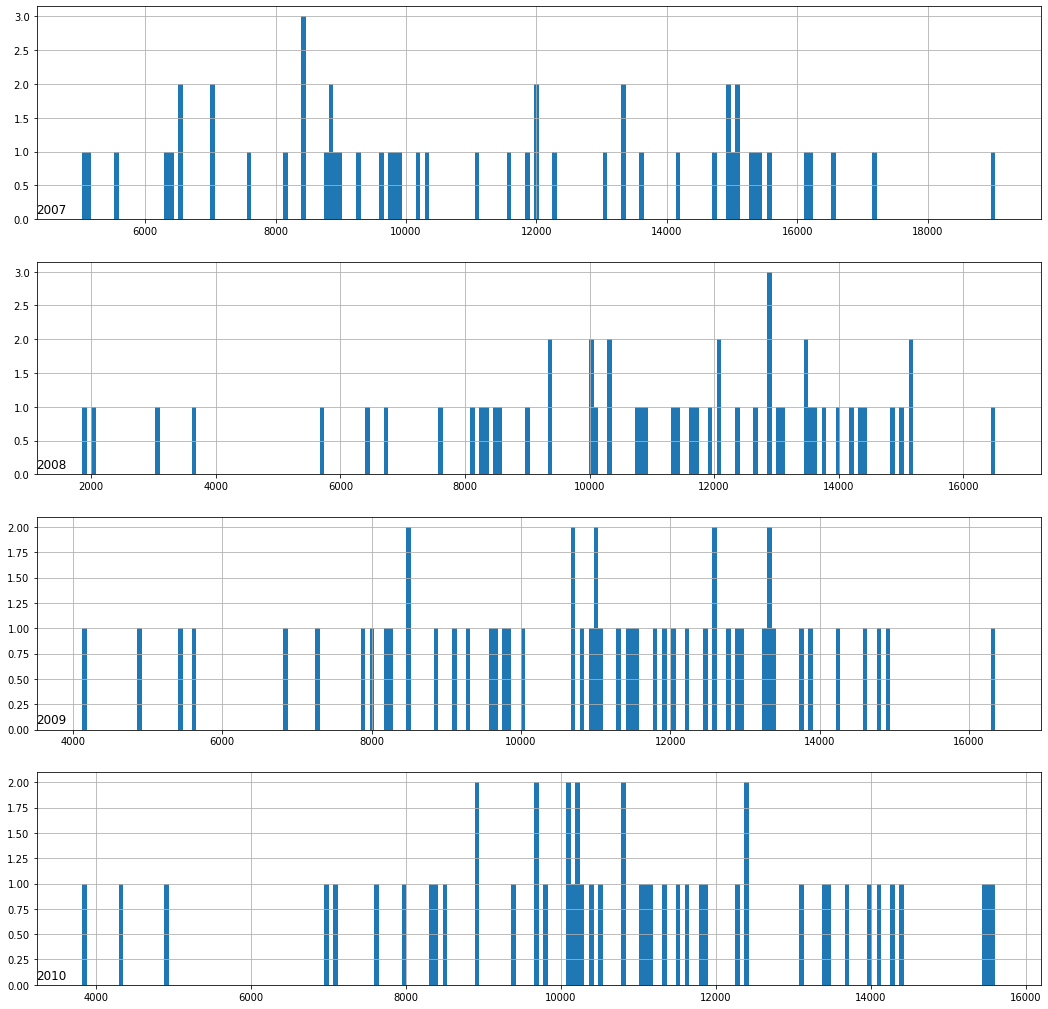

In [27]:
fig, ax=plt.subplots(figsize=(18,18))

for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power_data = dataset[str(year)]
    active_power_data['Global_active_power'].hist(bins=200)
    plt.title(str(year), y=0, loc='left')
plt.show()
fig.tight_layout()

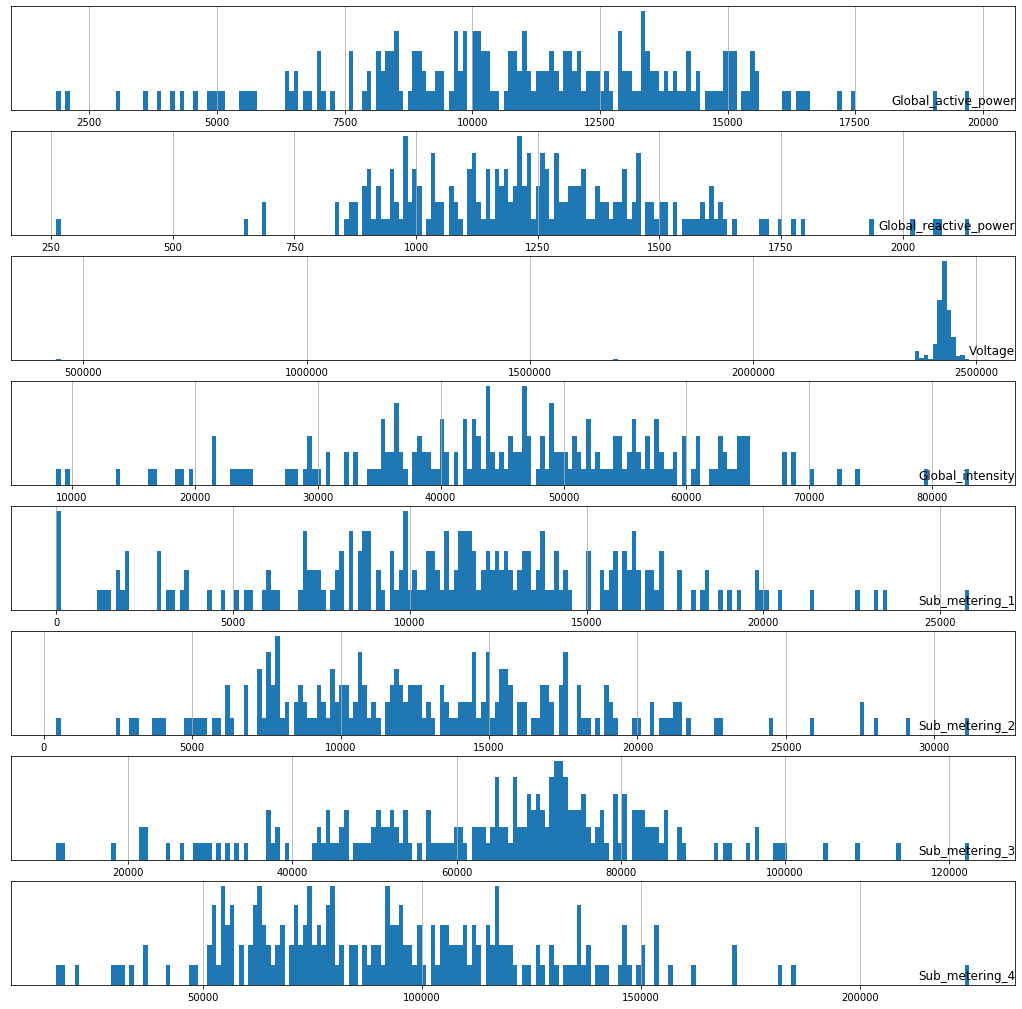

In [28]:

#for full data
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(dataset.columns)):
    plt.subplot(len(dataset.columns), 1, i+1)
    name=dataset.columns[i]
    dataset[name].hist(bins=200)
    plt.title(name, y=0, loc='right')
    plt.yticks([])
plt.show()
fig.tight_layout()

## Multivariate

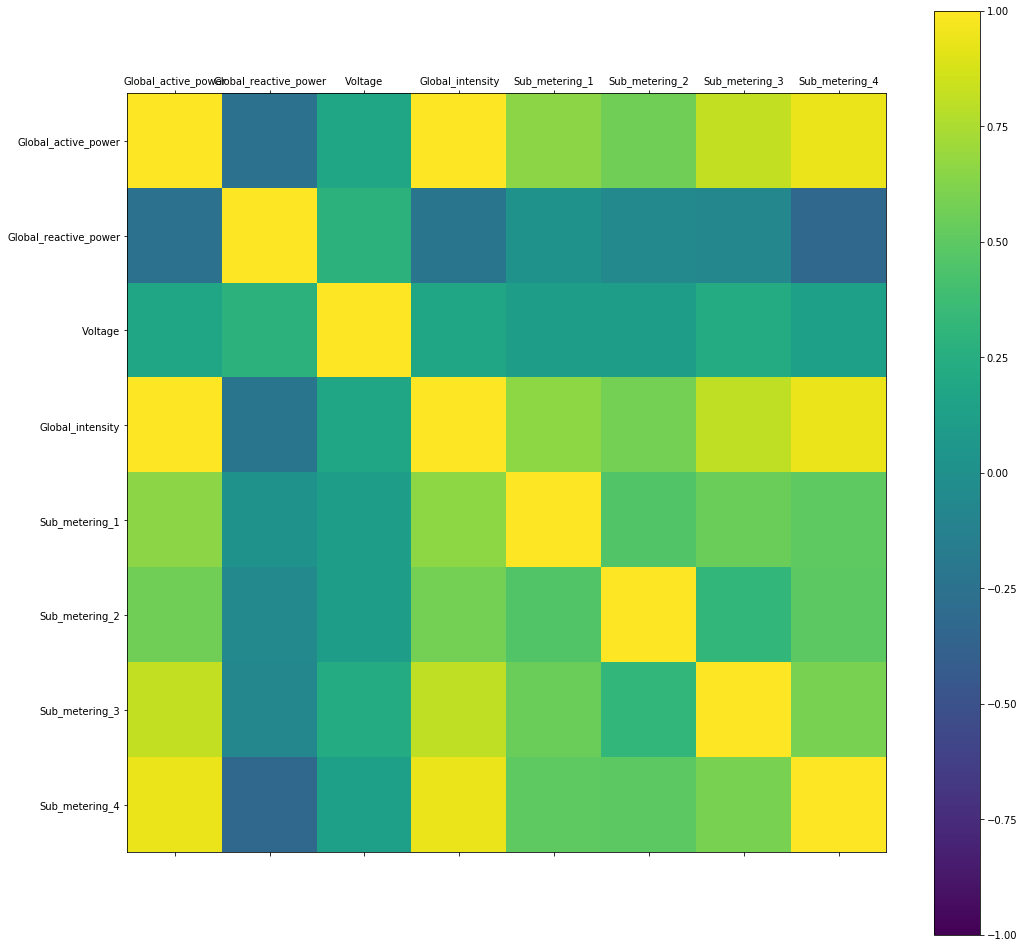

In [29]:
#correlation matrix (multivariate)
correlations = dataset.corr()

fig=plt.figure(figsize=(17,17))
ax=fig.add_subplot(111)
cax=ax.matshow(correlations, vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [30]:
names=dataset.columns

In [31]:
skew=dataset.skew()
print(skew)

Global_active_power      -0.24
Global_reactive_power     0.39
Voltage                 -12.14
Global_intensity         -0.25
Sub_metering_1           -0.09
Sub_metering_2            0.57
Sub_metering_3           -0.33
Sub_metering_4            0.48
dtype: float64


## Active power uses prediction

#### Models use to predict
Linear Regression

Lasso Regressor

Random Forest Prediction

Decision tree

KNN

In [32]:
df=pd.DataFrame(dataset)

In [33]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-17,4599.64,260.93,4.39e+05,19579.40,2033.00,4733.0,18267.00,51627.60
2006-12-24,17479.31,1176.42,2.43e+06,74001.66,11192.24,21353.6,77459.92,181316.10
2006-12-31,19738.70,1452.58,2.44e+06,83032.26,14239.24,22630.6,67249.92,224858.60
2007-01-07,14961.07,1348.95,2.43e+06,63122.20,5857.00,17599.0,54193.00,171702.13
2007-01-14,16177.43,1590.41,2.42e+06,68855.63,13421.12,18990.3,83362.46,153849.88


In [34]:
dataset.shape

(207, 8)

## Split the data into traning data and testing data
Train data to train the machine so that it can understand the relation between the features and target.

Test data is used to analyse that how much accuracy we are getting from the model.

For supervised model training data have training features and traing target which are to feed the model and testing data have testing features and testing target, testing  target values will be compare with predicted value and obtain the accuracy.

In [35]:
X=df.drop('Global_active_power',axis=1)
X=X.drop('Voltage',axis=1)
y=df['Global_active_power']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
X_train.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,
2007-07-01,1371.25,36635.03,13941.12,17970.30,46727.46,62371.81
2007-10-07,1094.75,50785.40,12732.00,29065.00,62154.00,95634.73
2008-06-22,1602.58,46951.20,22613.00,15383.00,79601.00,64179.53
2008-10-26,1000.81,48204.99,11856.24,12374.84,66887.71,99457.67
2009-09-06,1529.35,36675.20,9209.00,8605.00,58538.00,65097.07


In [37]:
y_train.head()

datetime
2007-07-01     8460.64
2007-10-07    11975.14
2008-06-22    10906.59
2008-10-26    11434.59
2009-09-06     8486.94
Name: Global_active_power, dtype: float64

In [38]:
X_test.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,
2010-01-17,1395.69,54676.86,13757.5,13641.07,84191.48,106556.64
2007-04-01,1323.09,59925.20,11715.0,25926.00,82813.00,115269.03
2008-05-11,1624.94,49617.20,16801.0,9288.00,72311.00,96886.57
2008-10-19,1115.23,54435.00,8696.0,21300.00,64229.00,120601.97
2010-02-21,964.29,59915.80,20449.0,16591.00,99966.00,102797.63


In [39]:
y_test.head()

datetime
2010-01-17    13088.80
2007-04-01    14143.38
2008-05-11    11717.19
2008-10-19    12889.62
2010-02-21    14388.22
Name: Global_active_power, dtype: float64

## MinMaxScaler

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train2 = pd.DataFrame(scaler.fit_transform(X_train))
X_test2 = pd.DataFrame(scaler.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

#### import all algorithms which are to be use

In [41]:
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

## Linear Regression

y = β0 + β1x1 + β2x2 + ··· βkxk 

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction1=lr.predict(X_test)

print('Results of  Linear Regression:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction1))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,prediction1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction1)))

Results of  Linear Regression:

Mean Absolute Error: 3.876669740313209e-06
Mean Squared Error: 2.3887379945074888e-11
Root Mean Squared Error: 4.887471733429758e-06


In [43]:
lr.score(X_test,y_test)

1.0

## Lasso Regressor

In [44]:

lassor = Lasso()
lassor.fit(X_train, y_train)
prediction2=lassor.predict(X_test)
print('Results of  Lasso Regressor:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction2))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,prediction2))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction2)))

Results of  Lasso Regressor:

Mean Absolute Error: 39.79441569979177
Mean Squared Error: 2516.4186160265654
Root Mean Squared Error: 50.16391747089301


In [45]:
lassor.score(X_test,y_test)

0.9996980737833318

## Random Forest Regressor

In [46]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
prediction3=rfr.predict(X_test)

print('Results of  RandomForest Regressor:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction3))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,prediction3))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction3)))

Results of  RandomForest Regressor:

Mean Absolute Error: 118.88090622591677
Mean Squared Error: 21687.560401604813
Root Mean Squared Error: 147.2669698255682


In [47]:
rfr.score(X_test,y_test)

0.9973978721111354

## Decision Tree Regressor

In [48]:
dtf=DecisionTreeRegressor()
dtf.fit(X_train, y_train)
prediction4=dtf.predict(X_test)
print('Results of  KNN regresion:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction4))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,prediction4))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction4)))

Results of  KNN regresion:

Mean Absolute Error: 158.92727711832248
Mean Squared Error: 38628.432815843364
Root Mean Squared Error: 196.5411733348597


In [49]:
dtf.score(X_test,y_test)

0.9953652637515745

## KNN 

In [50]:
knn=KNeighborsRegressor()
knn.fit(X_train, y_train)
prediction5=knn.predict(X_test)
print('Results of  KNN regresion:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction5))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,prediction5))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction5)))

Results of  KNN regresion:

Mean Absolute Error: 472.8393642138483
Mean Squared Error: 343005.08276066394
Root Mean Squared Error: 585.6663578870345


In [51]:
knn.score(X_test,y_test)

0.958845389921877

### Compare all the predicted values obtained by applied algorithm with actual data

In [52]:

df_result = pd.DataFrame({'Actual': y_test, 'LinearR': prediction1 , 'LassoR': prediction2 , 'RandomFR': prediction3,
                          'DecisionTreeR': prediction4, 'KNN': prediction5})
df_result.head()

,Actual,LinearR,LassoR,RandomFR,DecisionTreeR,KNN
datetime,,,,,,
2010-01-17,13088.80,13088.80,13014.46,13150.24,13348.00,12674.12
2007-04-01,14143.38,14143.38,14164.81,14177.61,14250.92,13896.10
2008-05-11,11717.19,11717.19,11676.67,11571.97,11492.45,11669.71
2008-10-19,12889.62,12889.62,12893.57,12835.09,12922.03,11999.09
2010-02-21,14388.22,14388.22,14319.16,14356.32,14245.63,14398.29


Linear regression algorithm have best MAE, MSE and RMSE is best among all other algorithms that we have used in this project.
So this is concluded that Linear Regression is most suitable for this problem.

Text(0.5, 1.0, 'Linear Regression')

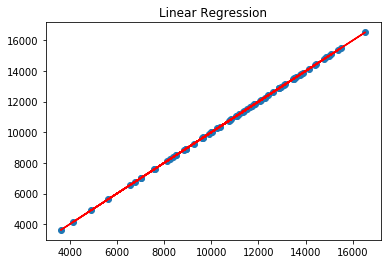

In [53]:

plt.scatter(df_result['Actual'],df_result['LinearR'])
plt.plot(y_test,y_test,'r')
plt.title("Linear Regression")

Text(0.5, 1.0, 'Lasso Regression')

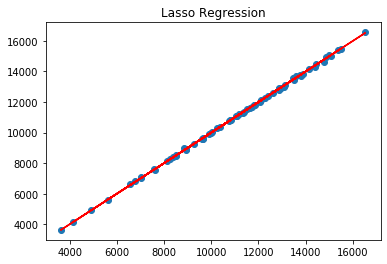

In [54]:

plt.scatter(df_result['Actual'],df_result['LassoR'])
plt.plot(y_test,y_test,'r')
plt.title("Lasso Regression")

Text(0.5, 1.0, 'Random forest Regression')

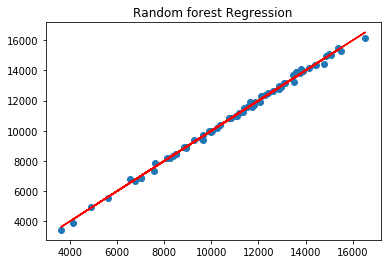

In [55]:

plt.scatter(df_result['Actual'],df_result['RandomFR'])
plt.plot(y_test,y_test,'r')
plt.title("Random forest Regression")

Text(0.5, 1.0, 'Decision Tree Regression')

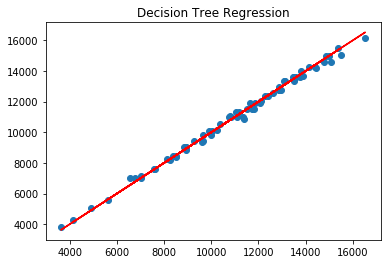

In [56]:

plt.scatter(df_result['Actual'],df_result['DecisionTreeR'])
plt.plot(y_test,y_test,'r')
plt.title("Decision Tree Regression")

Text(0.5, 1.0, 'KNN Regression')

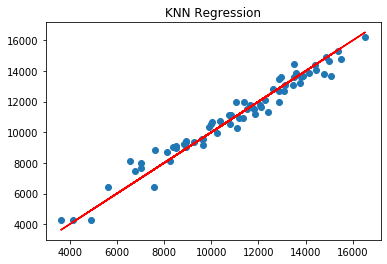

In [57]:

plt.scatter(df_result['Actual'],df_result['KNN'])
plt.plot(y_test,y_test,'r')
plt.title("KNN Regression")